# Predictive Churn Model


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Load the dataset

In [2]:
data_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(data_path)

### Define the features (independent variables)

In [3]:
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']

### Extract features and target variable

In [4]:
X = df[features]
y = df['Exited']

### Split the data into training and testing sets (80% train, 20% test)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize the Random Forest classifier with optimized hyperparameters

In [7]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Splitting criterion (default is 'gini')
    max_depth=None,  # Maximum depth of the tree (None means unlimited)
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,  # Minimum samples required to be a leaf node
    max_features='auto',  # Number of features to consider for the best split
    random_state=42,  # Random seed for reproducibility
    n_jobs=-1,  # Use all available CPU cores for training
)

### Train the classifier on the training data

In [8]:
rf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_jobs=-1, random_state=42)

### Make predictions on the testing data

In [9]:
y_pred = rf_classifier.predict(X_test)

### Calculate accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


### Generate a classification report

In [11]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1607
           1       0.57      0.43      0.49       393

    accuracy                           0.83      2000
   macro avg       0.72      0.68      0.69      2000
weighted avg       0.81      0.83      0.82      2000



### Visualize feature importances

In [12]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

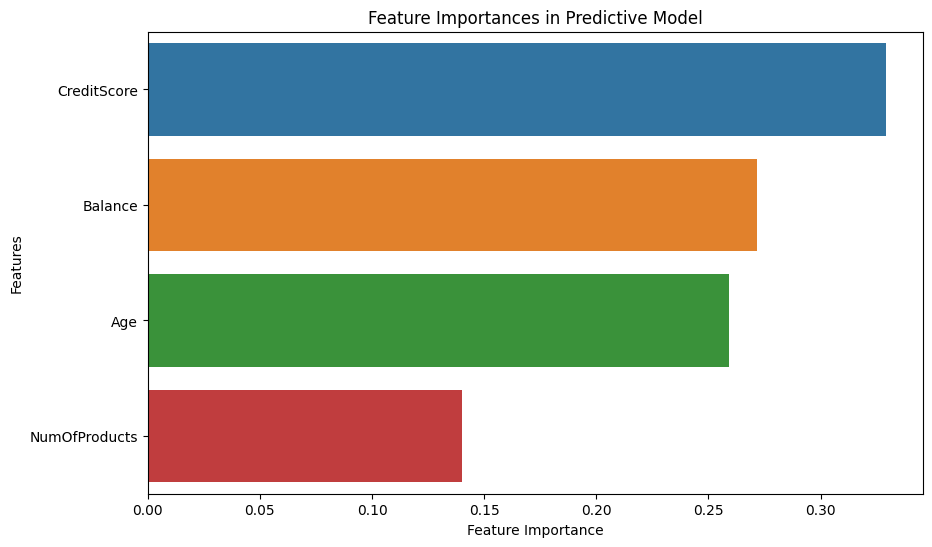

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_sorted.values, y=feature_importances_sorted.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Predictive Model')
plt.show()

### Save the trained model to a file for future use

In [14]:
model_filename = 'churn_prediction_model.pkl'
joblib.dump(rf_classifier, model_filename)

['churn_prediction_model.pkl']